## Importing the Dataset

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading and loading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.head (10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
data.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

In [6]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Checking Null values in the dataframe

In [7]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
np.nan, None

(nan, None)

In [9]:
data.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

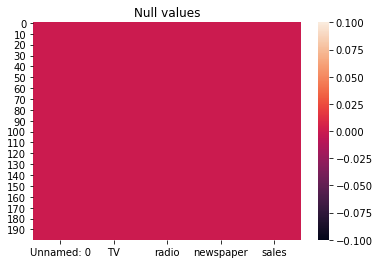

In [12]:
sns.heatmap(data.isnull())
plt.title('Null values')
plt.show()

In [13]:
# Checking data discription.
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [14]:
data.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

### EDA

In [15]:
# Removing Unnamed:0 column.
data.drop(['Unnamed: 0'],axis=1,inplace=True)

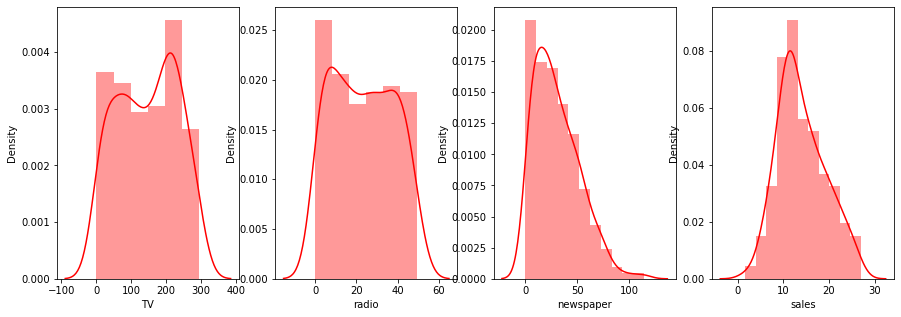

In [16]:
# Checking data distribution for each column.
plt.figure(figsize=(15,5),facecolor='white')
count = 1
for column in data:
    if count <=4:
        ax = plt.subplot(1,4,count)
        sns.distplot(data[column],color='r',)
    count+=1
plt.show()
    

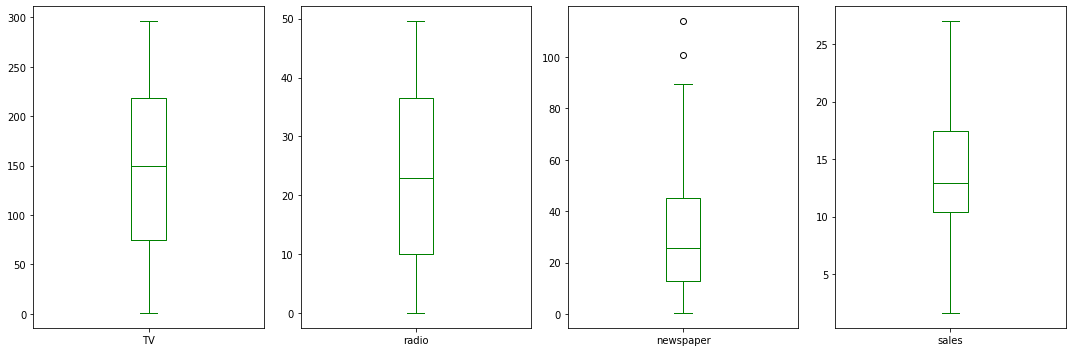

In [17]:
# Checking outlier in each column.
plt.figure(figsize=(15,5),facecolor='white')
count = 1
for column in data:
    if count <=4:
        ax = plt.subplot(1,4,count)
        data[column].plot(kind= 'box', color = 'g')
    count+=1
plt.tight_layout()

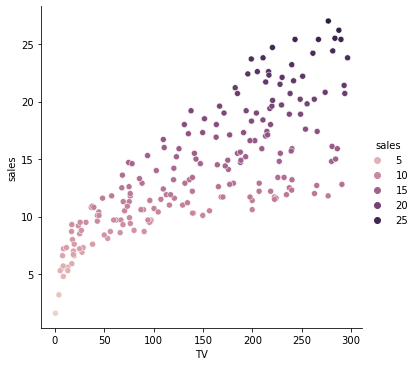

In [18]:
# checking relationship between TV and sales by ploting Rel plot.
sns.relplot(x= 'TV',y='sales',data=data, hue = 'sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

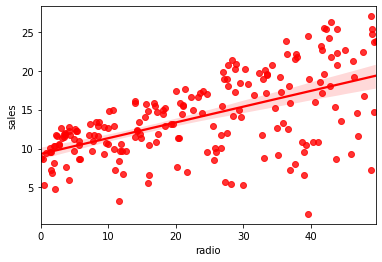

In [19]:
# Let's plot regplot between sales and radio investment.
sns.regplot(x = 'radio',y = 'sales',data=data, color='red')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

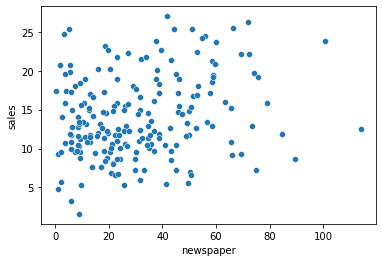

In [20]:
# Ploting scatter plot between sales and newspaper.
sns.scatterplot(x= 'newspaper',y='sales',data=data )


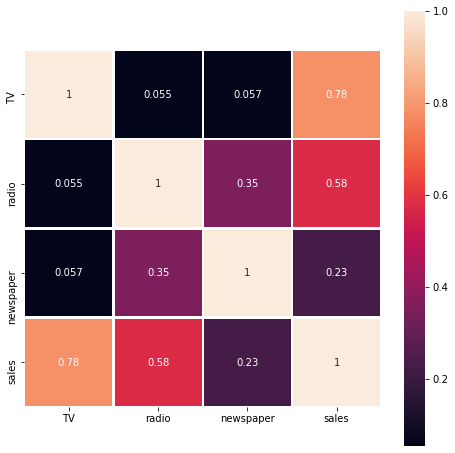

In [21]:
# Let's check correlationship between all the variables and label vs variables.
data_corr = data.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(data_corr,linewidths=1.5,annot=True, square=True)
plt.show()

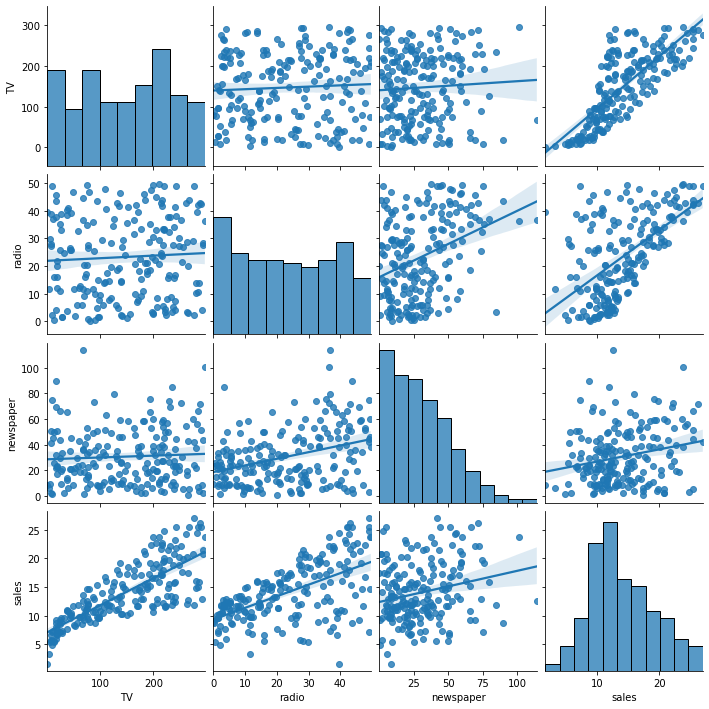

In [22]:
# Pairplot for all the datasets.
sns.pairplot(data,kind = 'reg')


### Outliers

In [23]:
df = data.copy()

In [24]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [25]:
cols = ['TV', 'radio', 'newspaper', 'sales']

<AxesSubplot:>

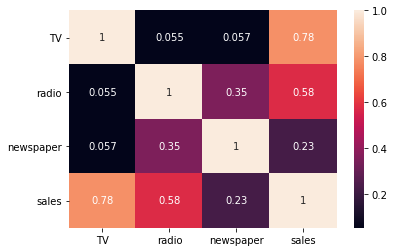

In [26]:
sns.heatmap(data.corr(),annot=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


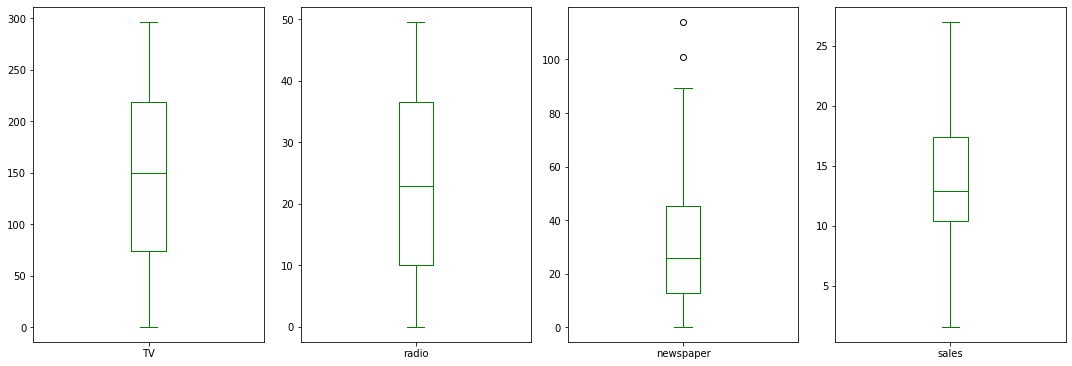

In [28]:
# Let's plot Boxplot to check outliers in our dataset.
plt.figure(figsize= (15,10))
count =1
for x in cols:
    if count <=8:
        ax = plt.subplot(2,4,count)
        data[x].plot(kind = 'box',color ='g')
    count +=1
plt.tight_layout()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Removing Skewness and Outliers

In [30]:
# Let's first deal with Outliers.
from scipy.stats import zscore
z =np.abs(zscore(data))
df = data[(z<3).all(axis = 1)]

In [31]:
print('Data size before z_score: ',data.shape,' Data size after z_score: ',df.shape)

Data size before z_score:  (200, 4)  Data size after z_score:  (198, 4)


In [32]:
data_loss = ((200 - 198)/200)*100
print('Data loss after applying Z_score: ',data_loss)

Data loss after applying Z_score:  1.0


In [33]:
#Let's check skewness again for new data frame.
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

### Seperating Independant variables and Target variable

In [34]:
# Seperating Features and Label.
x = df.drop(['sales'],axis=1)
y = df['sales']

In [35]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

### Transforming data to remove skewness:

In [36]:
 # let's remove the skewness 
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new  = pd.DataFrame(df_new,columns=x.columns)
df_new.head()

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622


In [37]:
df_new.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

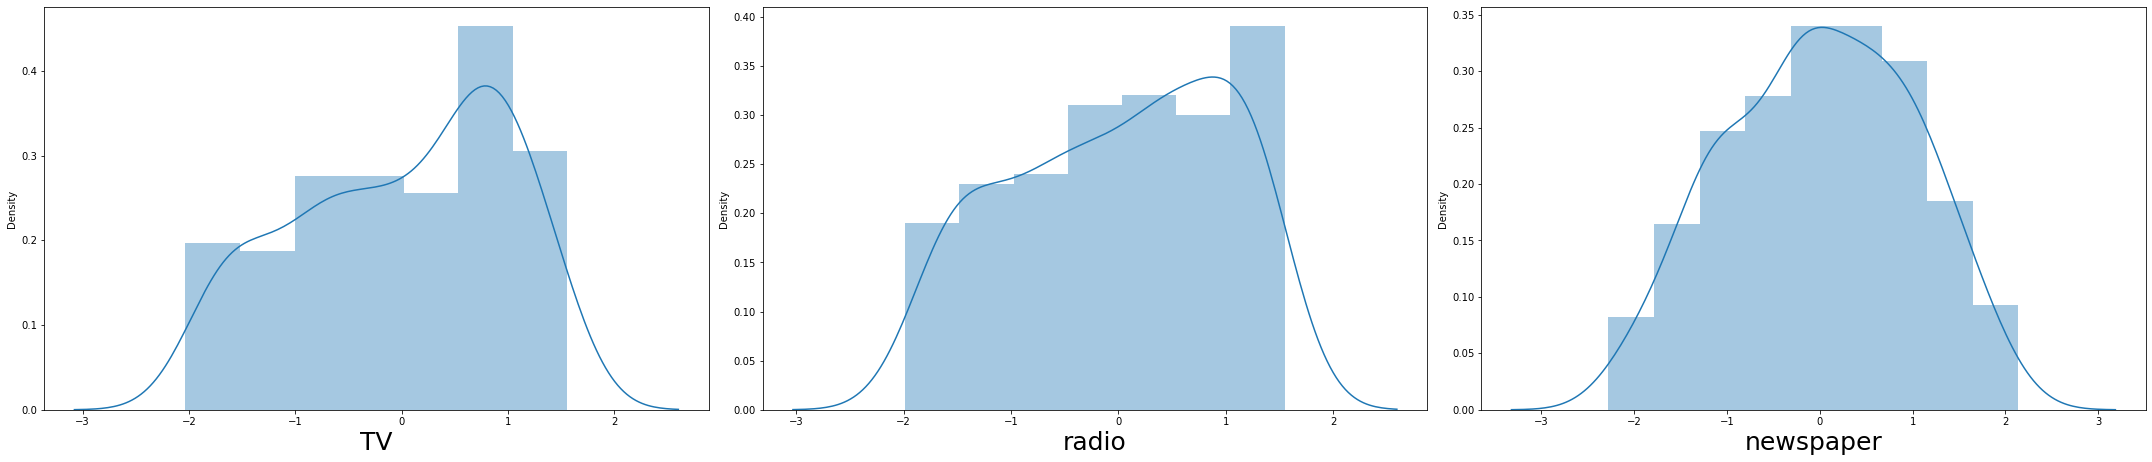

In [38]:
# Let's check distribution again.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

In [39]:
x = df_new ## Lets store this Dataframe back to x.

### Scaling (Standardization)

In [40]:
# scaling our x data using Standardscaler.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

### Train - test split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=43)

In [42]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(148, 3) (148,) (50, 3) (50,)


### Splitting the dataframe:

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [46]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 0.8709090909090913
Mean squared error 1.4216606060606072
Root Mean squared error 1.19233410001585
R2 Score 0.9470556259504269
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.8611882728349203
Mean squared error 2.258037652306475
Root Mean squared error 1.5026768289643901
R2 Score 0.9159079251601367
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.8878787878787878
Mean squared error 1.56060606060606
Root Mean squared error 1.2492421945347747
R2 Score 0.9418811278412567
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.2479379397062227
Mean squared error 2.5393138528981307
Root Mean squared error 1.5935224670201957
R2 Score 0.905432856559458
-------------------------

### Hyper parameter tuning using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'n_estimators': np.arange(100,150,10),
               'max_features': ['auto','sqrt','log'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,10,2),
               'min_samples_leaf': np.arange(5,20,5)}

In [49]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid= params,cv=5,n_jobs= -1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': ['auto', 'sqrt', 'log'],
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [50]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 130}

In [51]:
 rfr_2 = RandomForestRegressor(n_estimators=100,max_depth=8,max_features='auto',min_samples_leaf=5,min_samples_split=4,random_state=36)

In [52]:
rfr_2.fit(x_train,y_train) ### Training data

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=4,
                      random_state=36)

In [53]:
y_pred = rfr_2.predict(x_test)

In [54]:
r2_score(y_test,y_pred)

0.9590957411275093

### Saving our model

In [55]:
import pickle
Advertising = 'advertising.pickle'
pickle.dump(RandomForestRegressor(),open(Advertising,'wb'))